Module 3, Lab 2 - Association
=============================

In this lab, we will examine how to analyze data for a correlation. Note
that a detailed dive into correlational and regression-based research is
given in Module 5. However, a brief overview is provided here. I focus
on correlation because it is the simplest way to make an association
claim, but as we saw in the online lesson, actually the correct analysis
depends on your data (continuous, discrete, normal vs non-normal, etc.).
Thus, a full illustration of all association techniques would take many,
many labs. I focus on correlation here.
___
Módulo 3, Laboratório 2 - Associação
====
Neste laboratório, examinaremos como analisar dados para uma correlação. Observe que um mergulho detalhado na pesquisa correlacional e baseada em regressão é fornecido no Módulo 5. No entanto, uma breve visão geral é fornecida aqui. Eu me concentro na correlação porque é a maneira mais simples de fazer uma afirmação de associação, mas, como vimos na lição online, na verdade, a análise correta depende dos seus dados (contínuos, discretos, normais vs não normais, etc.). Portanto, uma ilustração completa de todas as técnicas de associação exigiria muitos, muitos laboratórios. Eu me concentro na correlação aqui.
___


In this example, you are analyzing customer loyalty data. Your
organization uses three measures of loyalty, and you wish to test them
out. (To avoid discussions of popular real measures, we will name these
`loytalty1`, `loyalty2`, and `loyalty3`).

Note that this lab uses the `ggplot2` package for data visualization and
the `psych` package for correlation testing. I also assume you are
familiar with `ggplot2`. As an alternative to the `psych` tools, we can
also use the `Hmisc` package for correlation testing.
___
Neste exemplo, você está analisando dados de fidelidade do cliente. Sua organização usa três medidas de lealdade e você deseja testá-las. (Para evitar discussões sobre medidas reais populares, vamos chamá-las de lealdade1, lealdade2 e lealdade3).

Observe que este laboratório usa o pacote ggplot2 para visualização de dados e o pacote psic para teste de correlação. Também presumo que você esteja familiarizado com o ggplot2. Como alternativa às psych tool, também podemos usar o pacote Hmisc para teste de correlação.

In [1]:
#### LOAD PACKAGES ####
## Use inline magic command so plots appear in the data frame
%matplotlib inline

## Next the packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import math

You load the data from the CSV file in the github folder for this lab:
___
Você carrega os dados do arquivo CSV na pasta github deste laboratório:

In [2]:
#### LOAD DATA ####
dat = pd.read_csv("datasets/loyaltydata.csv")

You inspect the data:
___

Você inspeciona os dados:

In [3]:
print(dat.columns)

dat.head()

Index(['Unnamed: 0', 'loyalty1', 'loyalty2', 'loyalty3'], dtype='object')


,Unnamed: 0,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4


There is an ID variable shown as `Unnamed` and scores on a loyalty measures named
`loyalty1` through `loyalty3`. 

****
**Note:** You are not yet familiar with the scaling of these measures.
***

The first thing to do is to explore the variables. The Pandas `describe()` method.

___
Há uma variável de ID mostrada como `Unnamed` e pontuações em medidas de loyalty denominadas `loyalty1` até `loyalty3`.

Observação: você ainda não está familiarizado com a escala dessas medidas.

A primeira coisa a fazer é explorar as variáveis. O método Pandas describe ().

In [4]:
dat.describe()

,Unnamed: 0,loyalty1,loyalty2,loyalty3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,9.960000,10.449000,5.072000
std,288.819436,1.043786,1.332357,1.045901
min,1.000000,7.000000,7.000000,2.000000
25%,250.750000,9.000000,10.000000,4.000000
50%,500.500000,10.000000,10.000000,5.000000
75%,750.250000,11.000000,11.000000,6.000000
max,1000.000000,13.000000,16.000000,8.000000


This gives you a sense as to the range and scaling of each loyalty
measure.

Imagine that each loyalty measure was in common use. You might want to
know whether they are highly correlated. We can compute correlations
between variables with the Pandas `corr()` method. A subset of the data frame is taken (using the outer `[]` operator) by providing a list (the inner `[]`) of column names.
___

Isso lhe dá uma noção do alcance e da escala de cada medida de fidelidade.

Imagine que cada medida de lealdade fosse de uso comum. Você pode querer saber se eles são altamente correlacionados. Podemos calcular correlações entre variáveis ​​com o método Pandas corr (). Um subconjunto do quadro de dados é obtido (usando o operador externo []) fornecendo uma lista (o interno, inner[]) de nomes de coluna.


In [5]:
dat[['loyalty1', 'loyalty2', 'loyalty3']].corr()

,loyalty1,loyalty2,loyalty3
loyalty1,1.000000,0.395853,0.498695
loyalty2,0.395853,1.000000,0.573709
loyalty3,0.498695,0.573709,1.000000


This difficult to read. Let's use the Pandas `round()` method:
___

É difícil de ler. Vamos usar o método round () do Pandas:


In [6]:
corr_mat = dat[['loyalty1', 'loyalty2', 'loyalty3']].corr().round(2)
corr_mat

,loyalty1,loyalty2,loyalty3
loyalty1,1.0,0.40,0.50
loyalty2,0.4,1.00,0.57
loyalty3,0.5,0.57,1.00


We see here that the variables are *not* highly correlated with each
other. This is a potential problem.

A brief refresher: correlations range between zero (no association
between variables) and 1.0 (a one-to-one association). They can also be
positive (as one variable increases, so does the other) or negative (as
one variable increases, the other decreases).
___
Vemos aqui que as variáveis ​​não são altamente correlacionadas entre si. Este é um problema potencial.

Uma breve atualização: as correlações variam entre zero (nenhuma associação entre as variáveis) e 1,0 (uma associação um-para-um). Eles também podem ser positivos (conforme uma variável aumenta, a outra aumenta) ou negativos (conforme uma variável aumenta, a outra diminui).


The statistician Jacob Cohen suggested the following guidelines:  

<pre>
| # | Correlation |  Meaning   |
|---|-------------|------------|
| 1 |  0.0 - 0.1  | Negligible |
| 2 |  0.1 - 0.3  |   Small    |
| 3 |  0.3 - 0.5  |   Medium   |
| 4 |    0.5 +    |   Large    |
</pre>

However, given that they are all ostensibly measuring the same thing,
loyalty, we should expect much higher correlations (.7-.9).

We can also easily visualize this correlation with using the `heatmap` function from the Python Seaborn package. Seaborn is a sophisticated statistical charting package. 

___
O estatístico Jacob Cohen sugeriu as seguintes diretrizes:

No entanto, dado que todos eles estão medindo ostensivamente a mesma coisa, lealdade, devemos esperar correlações muito mais altas (0,7-0,9).

Também podemos visualizar facilmente essa correlação usando a função de mapa de calor do pacote Python Seaborn. Seaborn é um pacote sofisticado de gráficos estatísticos.


Text(0.5,1,'Correlation matrix for loyalty features')

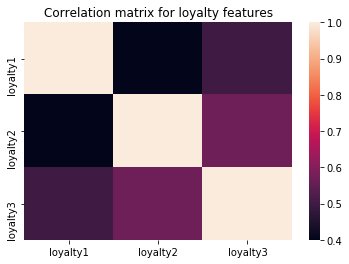

In [7]:
sns.heatmap(corr_mat, vmax=1.0) 
plt.title('Correlation matrix for loyalty features')

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

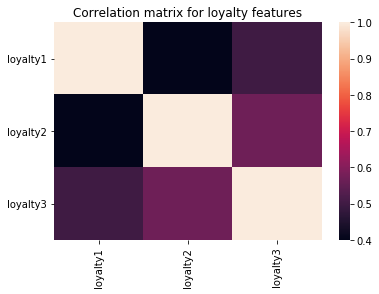

In [8]:
sns.heatmap(corr_mat, vmax=1.0) 
plt.title('Correlation matrix for loyalty features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

Next, you will create scatter plots of each pairwise combination of loyalty variables. The code uses the `lmplot` function from Seaborn. Jitter on both the x and y axes along with high point transparency are used to help deal with over-plotting. Notice that the transparency argument, `alpha`, must be passed to the underling Matplotlib in a dictionary called `scatter_kws`. 
___

A seguir, você criará gráficos de dispersão de cada combinação de pares de variáveis ​​de lealdade. O código usa a função lmplot da Seaborn. Jitter em ambos os eixos `x` e `y` junto com transparência de ponto alto são usados ​​para ajudar a lidar com overplotting. Observe que o argumento de transparência, alfa, deve ser passado para o Matplotlib subjacente em um dicionário chamado scatter_kws.

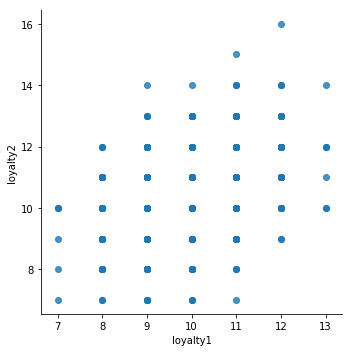

In [9]:
sns.lmplot("loyalty1", "loyalty2", dat, fit_reg = False)

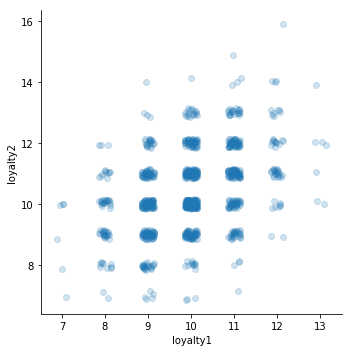

In [10]:
sns.lmplot("loyalty1", "loyalty2", dat, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':0.2}, fit_reg = False)

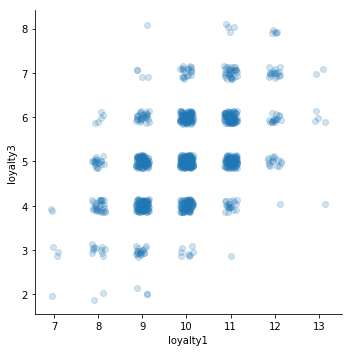

In [11]:
sns.lmplot("loyalty1", "loyalty3", dat, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':0.2}, fit_reg = False)

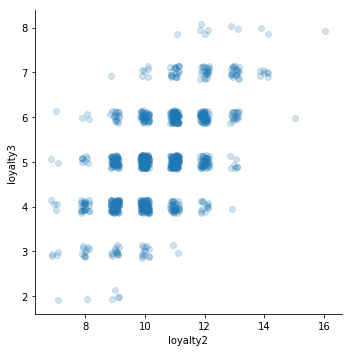

In [12]:
sns.lmplot("loyalty2", "loyalty3", dat, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':0.2}, fit_reg = False)

![](Mod3_Lab2_-_Association_files/figure-markdown_strict/unnamed-chunk-8-1.png)

![](Mod3_Lab2_-_Association_files/figure-markdown_strict/unnamed-chunk-8-3.png)
All of the graphs look about the same. It is always good to inspect the
plots, as we know that non-linearity can weaken our correlations. Here,
we see evidence that each measure is correlated linearly; the
associations are simply underwhelming.
___
Todos os gráficos têm a mesma aparência. É sempre bom inspecionar os gráficos, pois sabemos que a não linearidade pode enfraquecer nossas correlações. Aqui, vemos evidências de que cada medida é correlacionada linearmente; as associações são simplesmente desanimadoras.

![](Mod3_Lab2_-_Association_files/figure-markdown_strict/unnamed-chunk-9-1.png)

We can easily compute the confidence intervals of these correlation coefficients. However, this requires a few steps (don't worry if you don't follow this completely:   
1. Transform the correlation from the initial space which we call r to a transformed space z. The distribution of errors is Normal in this transformed space. 
2. Compute the CI in the transformed space.
3. Transform back to the original space.

___

Podemos calcular facilmente os intervalos de confiança desses coeficientes de correlação. No entanto, isso requer algumas etapas (não se preocupe se você não seguir completamente:

1. Transforme a correlação do espaço inicial que chamamos de r em um espaço transformado z. A distribuição de erros é Normal neste espaço transformado.
2. Calcule o IC no espaço transformado.
3. Transforme-se de volta ao espaço original.

In [14]:
def r_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

print('\nFor loyalty1 vs. loyalty2')
corr_mat = np.array(corr_mat)
conf_ints = r_conf_int(corr_mat[1,0], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[1,0], conf_ints[0], conf_ints[1]))
print('\nFor loyalty1 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,0], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[2,0], conf_ints[0], conf_ints[1]))
print('\nFor loyalty2 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,1], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[2,1], conf_ints[0], conf_ints[1]))


For loyalty1 vs. loyalty2
Correlation = 0.400 with CI of 0.347 to 0.451

For loyalty1 vs. loyalty3
Correlation = 0.500 with CI of 0.452 to 0.545

For loyalty2 vs. loyalty3
Correlation = 0.570 with CI of 0.527 to 0.610


In [15]:
corr_mat = dat[['loyalty1', 'loyalty2', 'loyalty3']].corr().round(2)
corr_mat

,loyalty1,loyalty2,loyalty3
loyalty1,1.0,0.40,0.50
loyalty2,0.4,1.00,0.57
loyalty3,0.5,0.57,1.00


You can see that the CIs of all the correlation coefficients are relatively small compared to the correlation coefficients. This indicates that these coefficients are statistically significant.
___

Você pode ver que os ICs de todos os coeficientes de correlação são relativamente pequenos em comparação com os coeficientes de correlação. Isso indica que esses coeficientes são estatisticamente significativos.

What Claims Can We Make?
========================

Here, we can make the following claims: each of these variables is
correlated with each other, but in reality, the correlations are weaker
than you would hope them to be. In this case, we can have a series of
conversations about whether these measures of loyalty are assessing
different things, whether there are actually different kinds of customer
loyalty, or whether the measures are not of high quality. Regardless,
there appears to *not* be a large association between our measures of
loyalty. In fact, using 95% CIs, we found that we had fairly precise
estimate of our correlations: they are not strong. This raises large
implications for our organization as it considers using these measures.

___

Que afirmações podemos fazer?
====
Aqui, podemos fazer as seguintes afirmações: cada uma dessas variáveis ​​está correlacionada umas com as outras, mas na realidade, as correlações são mais fracas do que você esperaria que fossem. Nesse caso, podemos ter uma série de conversas sobre se essas medidas de fidelidade estão avaliando coisas diferentes, se realmente existem diferentes tipos de fidelidade do cliente ou se as medidas não são de alta qualidade. Independentemente disso, parece não haver uma grande associação entre nossas medidas de lealdade. Na verdade, usando ICs de 95%, descobrimos que tínhamos uma estimativa bastante precisa de nossas correlações: elas não são fortes. Isso levanta grandes implicações para nossa organização, pois ela considera o uso dessas medidas.